In [10]:
import geopandas as gpd
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import calc_params
import altair as alt
from mpl_toolkits.mplot3d import Axes3D
alt.data_transformers.enable("vegafusion")

ModuleNotFoundError: No module named 'calc_params'

In [3]:
params = ['BuAre_sum', 'BuVol_3D_sum', 'BuSA_3D_sum', 'BuIBD', 'BuAdj', 'BuSWR_3D_median', 'BuHt_wmean','StrHW_median','BuOri_mean', 'BuSqC_wmean','BuFra_3D_wmean', 'StrClo400_median']

In [ ]:
def corr_matrix(params, radius):
    vars = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_{radius}.parquet')
    vars.index = vars['station_id']
    to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','sky_view_factor','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry','SVF']
    vars = vars.drop(to_remove, axis=1)

    scaler = StandardScaler()
    vars_scaled = scaler.fit_transform(vars)
    vars = pd.DataFrame(vars_scaled, columns=vars.columns, index=vars.index)

    # make column negative
    vars['BuSqC_wmean'] = -vars['BuSqC_wmean']
    vars['BuFra_3D_wmean'] = -vars['BuFra_3D_wmean']
    vars['BuIBD'] = -vars['BuIBD']
    vars['BuAdj'] = -vars['BuAdj']

In [4]:
radius = 200

In [11]:
vars = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_{radius}.parquet')
vars.index = vars['station_id']
to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','sky_view_factor','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry','SVF']
vars = vars.drop(to_remove, axis=1)

scaler = StandardScaler()
vars_scaled = scaler.fit_transform(vars)
vars = pd.DataFrame(vars_scaled, columns=vars.columns, index=vars.index)

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [29]:
# make column negative
vars['BuSqC_wmean'] = -vars['BuSqC_wmean']
vars['BuFra_3D_wmean'] = -vars['BuFra_3D_wmean']
vars['BuIBD'] = -vars['BuIBD']
vars['BuAdj'] = -vars['BuAdj']

In [59]:
vars[params]

,BuAre_sum,BuVol_3D_sum,BuSA_3D_sum,BuIBD,BuAdj,BuSWR_3D_median,BuHt_wmean,StrHW_median,BuOri_mean,BuSqC_wmean,BuFra_3D_wmean,StrClo400_median
station_id,,,,,,,,,,,,
FRASHA,-0.081816,-0.157665,-0.564225,-0.964411,-1.269277,-1.300411,0.094994,-0.347110,-0.595785,-0.632157,1.262623,-0.108182
FRBETZ,-0.206408,-0.249937,-0.175132,0.139061,0.691481,0.290427,0.039086,-0.228121,1.422865,0.656489,-0.088987,-1.160183
FRBRUH,1.110476,0.309665,-0.085113,-1.178946,-0.521952,-0.775831,-0.492080,-0.426024,0.478362,-0.386486,0.897490,NaN
FRDREI,-0.529935,-0.253377,-0.387989,-1.531954,0.674504,0.064112,0.826018,0.200092,0.921557,-0.749916,0.724296,-0.453104
FRFRIE,-1.902023,-1.382498,-1.744703,1.225465,-1.920009,-1.166693,-1.447660,NaN,1.542103,-0.980264,-1.773078,NaN
FRGART,-0.675534,-0.776873,-0.190070,0.371000,1.743349,2.992958,-0.867526,-0.243962,-0.355701,-0.213125,-2.663121,0.437777
FRGLBA,-0.993940,-0.794833,-0.828421,-1.080394,-1.096298,-1.194080,-0.114015,-0.757281,-0.698548,-0.778801,-0.523641,-0.719139
FRGUNT,-1.050535,-0.929971,-0.959149,-0.779062,-1.404465,-1.119066,-0.694129,-0.803633,1.173282,-0.577870,-0.706041,-0.924037
FRHAID,0.541906,-0.342353,-0.330964,0.087396,-0.718373,-0.967309,-1.207190,-1.011118,-0.093357,-0.499852,-0.157111,-0.920230


[Text(0, 0, 'FRASHA'),
 Text(1, 0, 'FRBETZ'),
 Text(2, 0, 'FRBRUH'),
 Text(3, 0, 'FRDREI'),
 Text(4, 0, 'FRFRIE'),
 Text(5, 0, 'FRGART'),
 Text(6, 0, 'FRGLBA'),
 Text(7, 0, 'FRGUNT'),
 Text(8, 0, 'FRHAID'),
 Text(9, 0, 'FRHBHF'),
 Text(10, 0, 'FRHERD'),
 Text(11, 0, 'FRHOLZ'),
 Text(12, 0, 'FRIHOC'),
 Text(13, 0, 'FRINST'),
 Text(14, 0, 'FRKART'),
 Text(15, 0, 'FRLAND'),
 Text(16, 0, 'FRLORE'),
 Text(17, 0, 'FRMESS'),
 Text(18, 0, 'FROWIE'),
 Text(19, 0, 'FRPDAS'),
 Text(20, 0, 'FRRIES'),
 Text(21, 0, 'FRSEEP'),
 Text(22, 0, 'FRSTGA'),
 Text(23, 0, 'FRSTGE'),
 Text(24, 0, 'FRSTUH'),
 Text(25, 0, 'FRUNIK'),
 Text(26, 0, 'FRUWIE'),
 Text(27, 0, 'FRVAUB'),
 Text(28, 0, 'FRWEIN'),
 Text(29, 0, 'FRWSEE'),
 Text(30, 0, 'FRZAHR')]

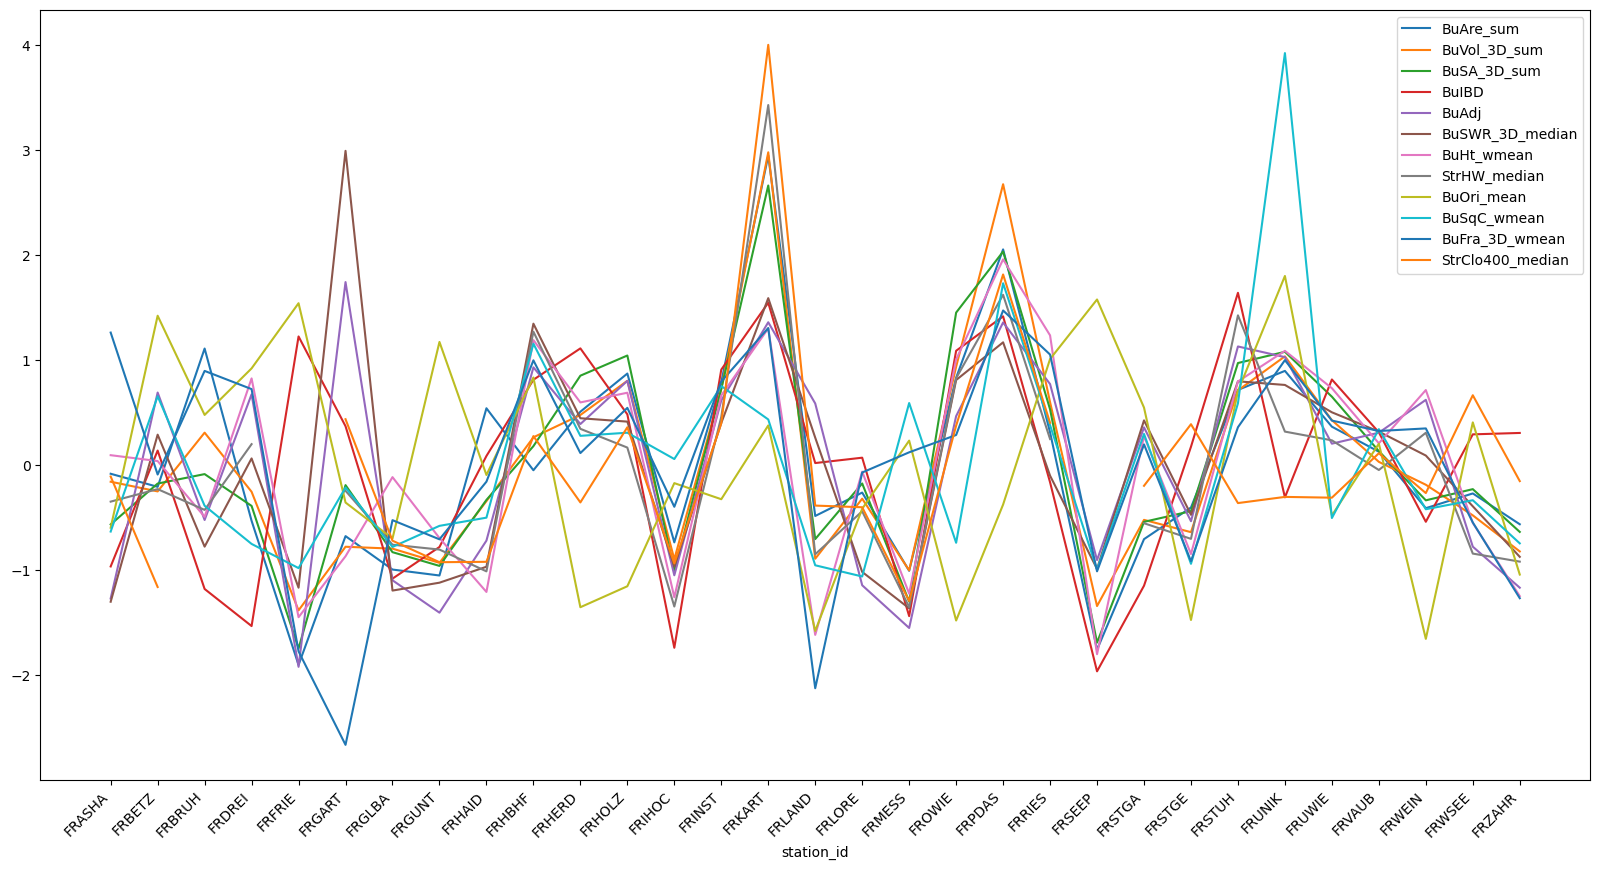

In [62]:
# show all x labels
ax=vars[params].plot(figsize=(20,10))
#plt.gca().set_xticklabels(vars.index.astype(str).values)
ax.set_xticks(range(len(vars[params])))  # This works if the index is numerical
ax.set_xticklabels(vars[params].index, rotation=45, ha='right')  # Ensure correct labels are used

<Axes: xlabel='BuSqC_wmean', ylabel='BuFra_3D_wmean'>

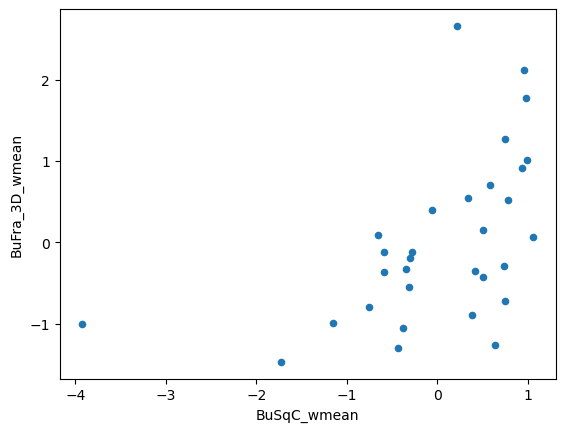

In [14]:
vars[['BuSqC_wmean','BuFra_3D_wmean']].plot(x='BuSqC_wmean',y='BuFra_3D_wmean',kind='scatter')

<Axes: xlabel='BuIBD', ylabel='BuAdj'>

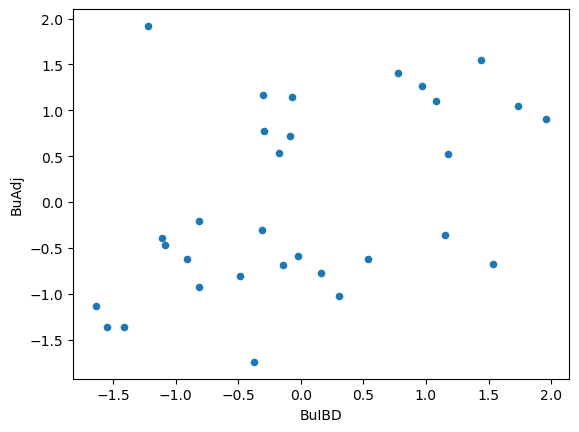

In [15]:
vars[['BuIBD',	'BuAdj']].plot(x='BuIBD',y='BuAdj',kind='scatter')

<Axes: xlabel='BuSqC_wmean', ylabel='BuAdj'>

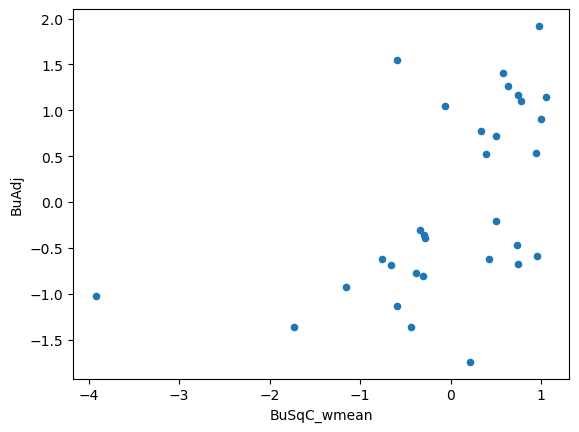

In [17]:
vars[['BuSqC_wmean',	'BuAdj']].plot(x='BuSqC_wmean',y='BuAdj',kind='scatter')

<Axes: xlabel='BuHt_wmean', ylabel='StrHW_median'>

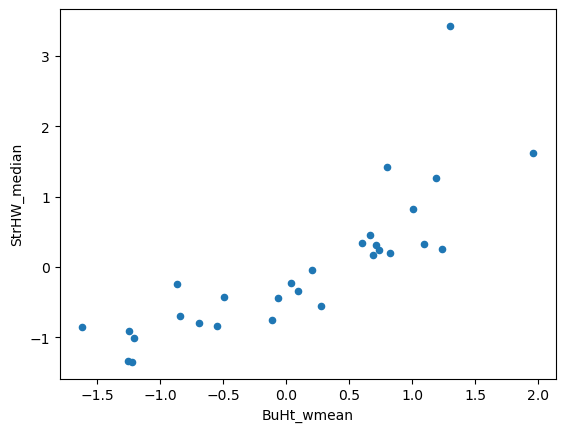

In [16]:
vars[['BuHt_wmean',	'StrHW_median']].plot(x='BuHt_wmean',y='StrHW_median',kind='scatter')

In [38]:
# cross correlation matrix of parameters
corr_p = vars[params].corr(method='pearson')

,BuAre_sum,BuVol_3D_sum,BuSA_3D_sum,BuIBD,BuAdj,BuSWR_3D_median,BuHt_wmean,StrHW_median,BuOri_mean,BuSqC_wmean,BuFra_3D_wmean,StrClo400_median
BuAre_sum,1.000000,0.950339,0.937006,0.548301,0.606460,0.504847,0.698436,0.802476,-0.152190,0.477489,0.668542,0.768588
BuVol_3D_sum,0.950339,1.000000,0.961648,0.575008,0.658524,0.562774,0.828212,0.893001,-0.058497,0.548607,0.720524,0.774968
BuSA_3D_sum,0.937006,0.961648,1.000000,0.664372,0.731464,0.665605,0.819987,0.886578,-0.162940,0.515617,0.609649,0.751515
BuIBD,0.548301,0.575008,0.664372,1.000000,0.454750,0.552783,0.439765,0.683003,-0.197646,0.205827,0.089640,0.577569
BuAdj,0.606460,0.658524,0.731464,0.454750,1.000000,0.916348,0.683675,0.713108,-0.053417,0.517217,0.312862,0.493940
BuSWR_3D_median,0.504847,0.562774,0.665605,0.552783,0.916348,1.000000,0.550447,0.661125,-0.064935,0.439027,0.102688,0.540199
BuHt_wmean,0.698436,0.828212,0.819987,0.439765,0.683675,0.550447,1.000000,0.812150,-0.005071,0.545479,0.791875,0.497343
StrHW_median,0.802476,0.893001,0.886578,0.683003,0.713108,0.661125,0.812150,1.000000,0.121634,0.384402,0.563230,0.775593
BuOri_mean,-0.152190,-0.058497,-0.162940,-0.197646,-0.053417,-0.064935,-0.005071,0.121634,1.000000,0.357142,0.133280,-0.060560
BuSqC_wmean,0.477489,0.548607,0.515617,0.205827,0.517217,0.439027,0.545479,0.384402,0.357142,1.000000,0.509706,0.171029


In [42]:
# cross correlation matrix of parameters
corr_s = vars[params].corr(method='spearman')

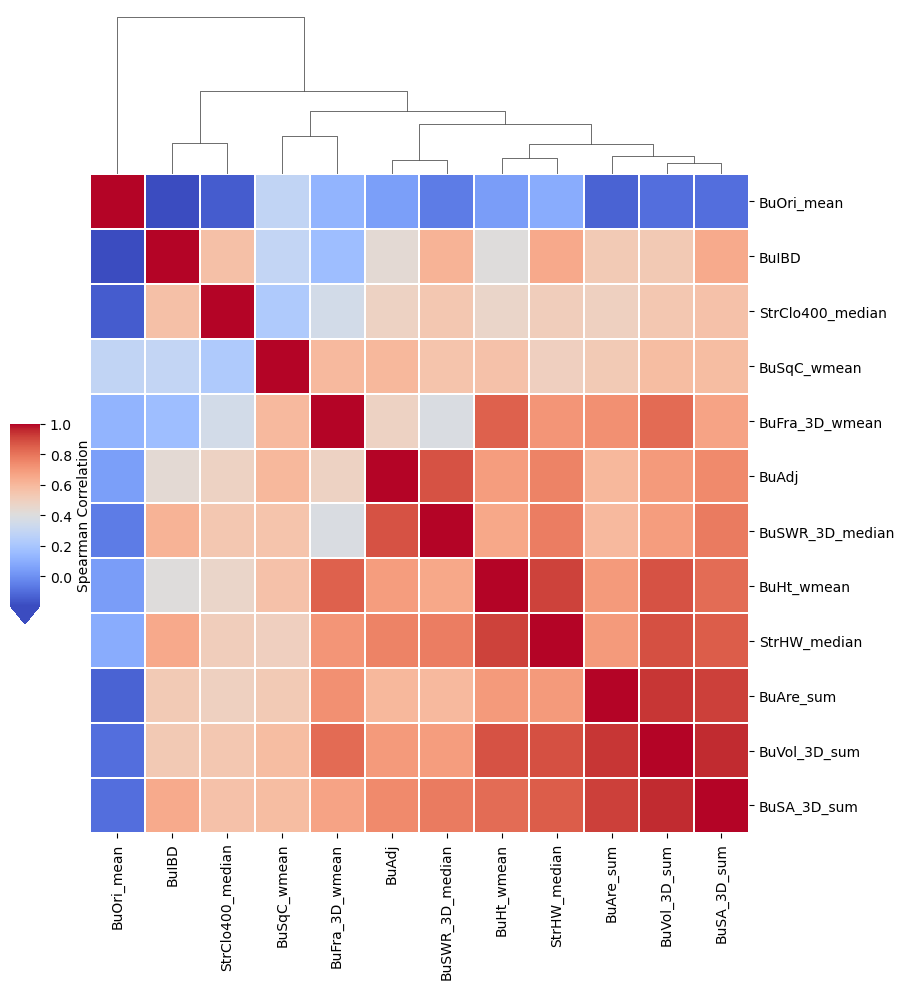

In [45]:
# combine heatmap and dendrogram
import seaborn as sns

# color bar keyword arguments
cbar_kws = {"shrink":1,
            'extend':'min', 
            'extendfrac':.1,  
            'ticks': [-0, 0.2, 0.4, 0.6, 0.8, 1.0], # set ticks of color bar
            'label': 'Spearman Correlation'}

g = sns.clustermap(corr_s, method='ward', metric='euclidean', cmap='coolwarm', figsize=(10,10), cbar_pos=(.1, .37, .03, .2),linewidths=.25, cbar_kws=cbar_kws)
g.ax_row_dendrogram.remove()
plt.savefig('/Users/lisawink/Documents/paper1/figures/clustermap_spearman.png', dpi=300)

plt.show()

In [90]:
def corr_matrix(params, radius):
    vars = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_{radius}.parquet')
    vars.index = vars['station_id']
    to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','sky_view_factor','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry','SVF']
    vars = vars.drop(to_remove, axis=1)

    scaler = StandardScaler()
    vars_scaled = scaler.fit_transform(vars)
    vars = pd.DataFrame(vars_scaled, columns=vars.columns, index=vars.index)

    # make column negative
    vars['BuSqC_wmean'] = -vars['BuSqC_wmean']
    vars['BuFra_3D_wmean'] = -vars['BuFra_3D_wmean']
    vars['BuIBD'] = -vars['BuIBD']
    vars['BuAdj'] = -vars['BuAdj']

    # cross correlation matrix of parameters
    corr_s = vars[params].corr(method='spearman')

    # color bar keyword arguments
    cbar_kws = {"shrink":1,
                'extend':'min', 
                'extendfrac':.1,  
                'ticks': [-0, 0.2, 0.4, 0.6, 0.8, 1.0], # set ticks of color bar
                'label': 'Spearman Correlation'}

    g = sns.clustermap(corr_s, method='ward', metric='euclidean', cmap='coolwarm', figsize=(10,10), cbar_pos=(.1, .37, .03, .2),linewidths=.25, cbar_kws=cbar_kws)
    g.ax_row_dendrogram.remove()
    #plt.suptitle('Clustermap of Spearman Correlation for Radius '+str(radius), fontsize=16, color='black', )
    plt.text(0.5, 3.5,str(radius)+ 'm Radius', size=14)
    plt.savefig('/Users/lisawink/Documents/paper1/figures/clustermap_spearman_'+str(radius)+'.png', dpi=300)

    plt.show()

    # show all x labels
    ax=vars[params].plot(figsize=(20,10))
    #plt.gca().set_xticklabels(vars.index.astype(str).values)
    ax.set_xticks(range(len(vars[params])))  # This works if the index is numerical
    ax.set_xticklabels(vars[params].index, rotation=45, ha='right')  # Ensure correct labels are used

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


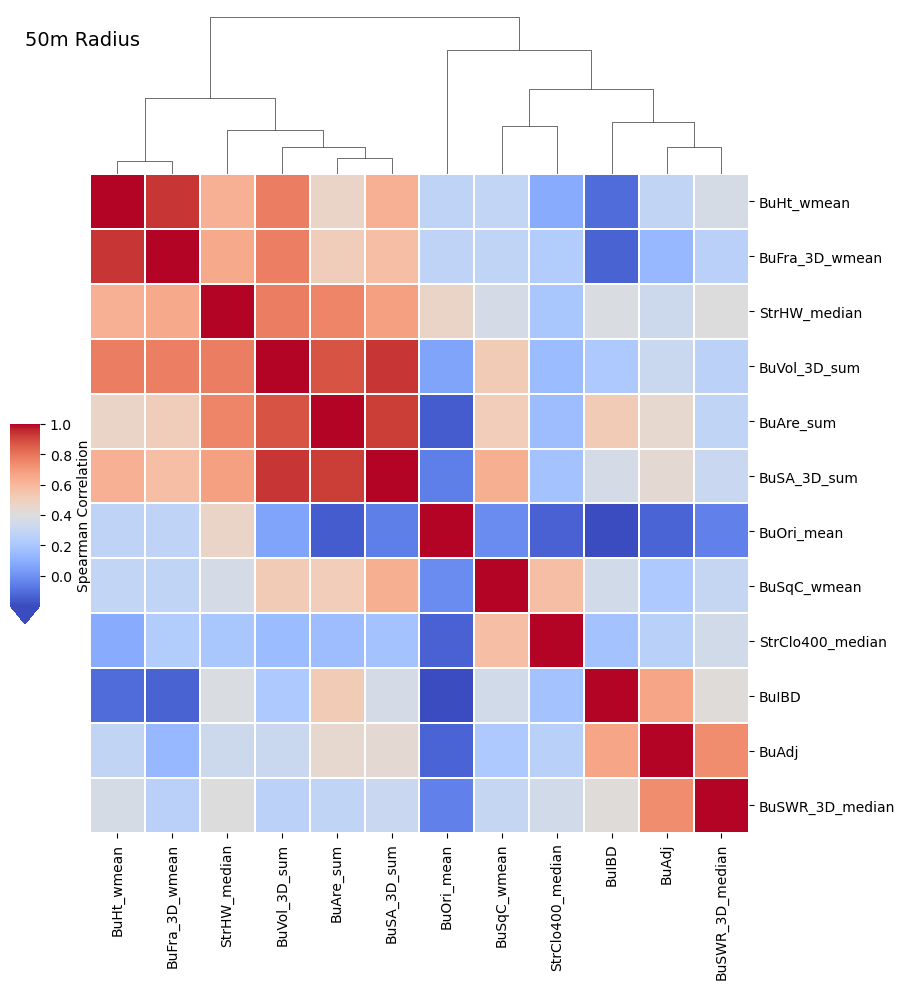

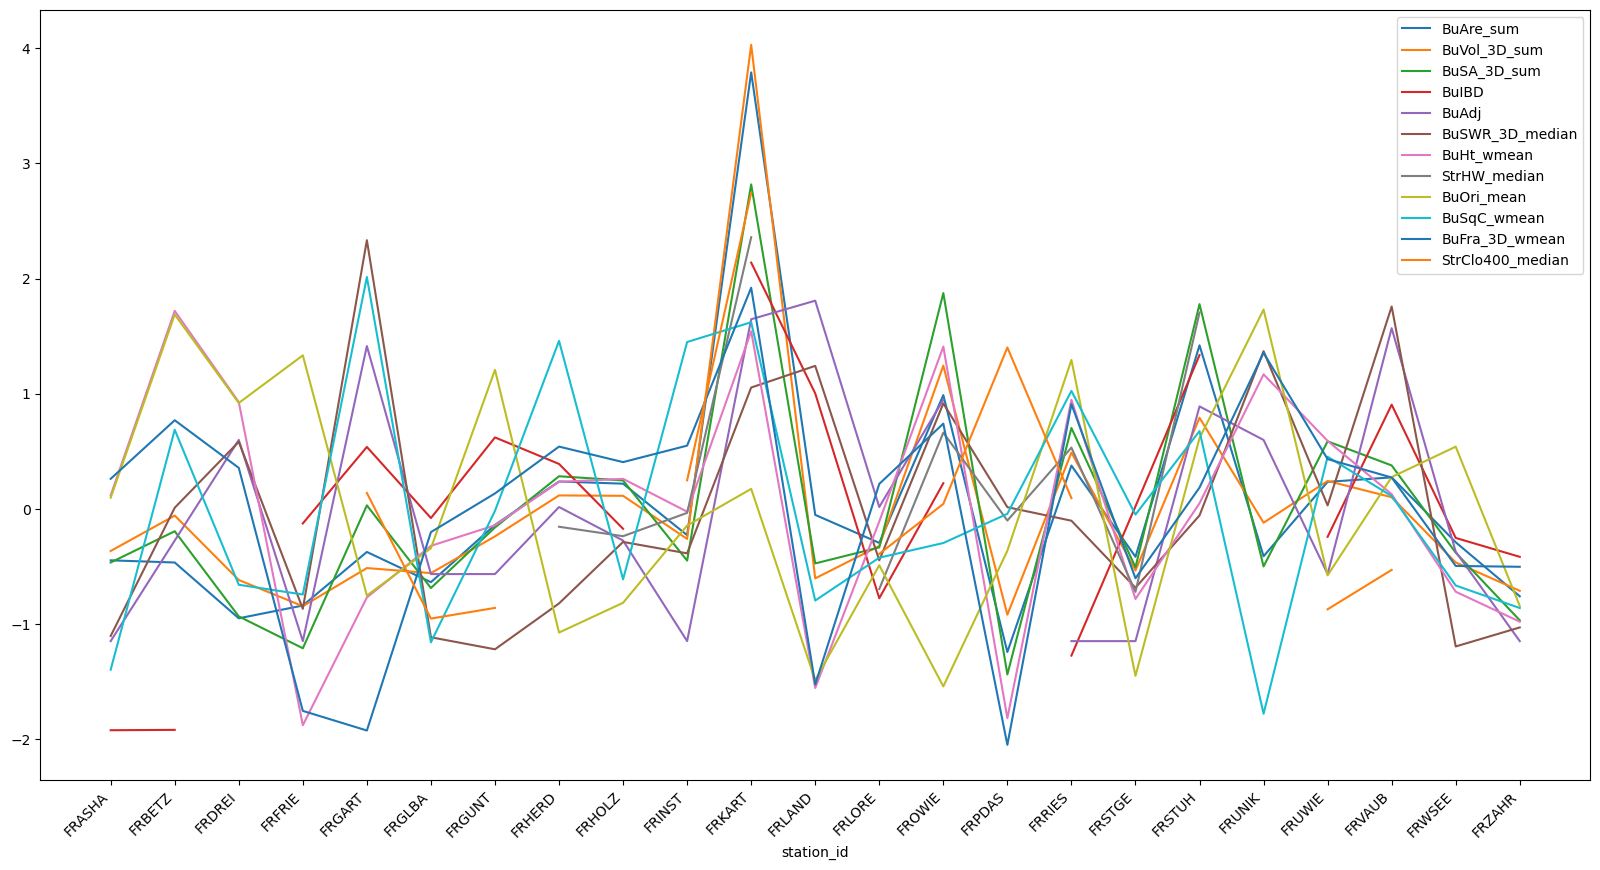

In [91]:
corr_matrix(params, 50)

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


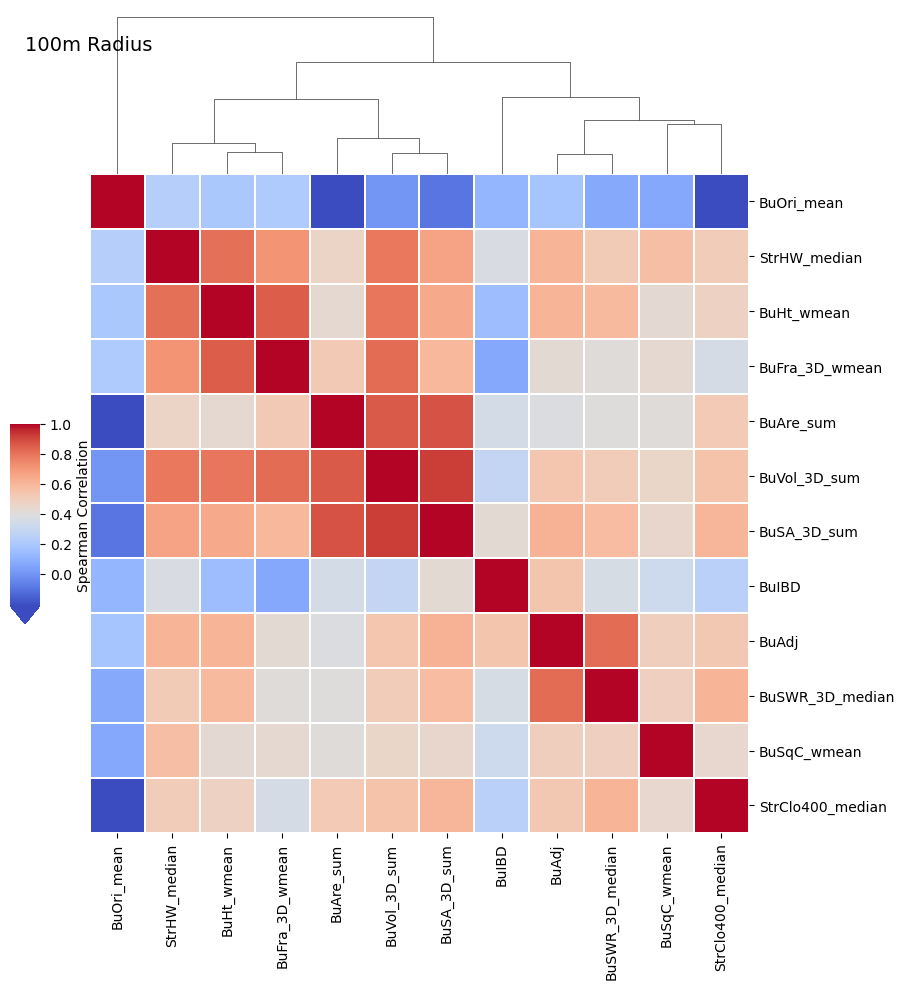

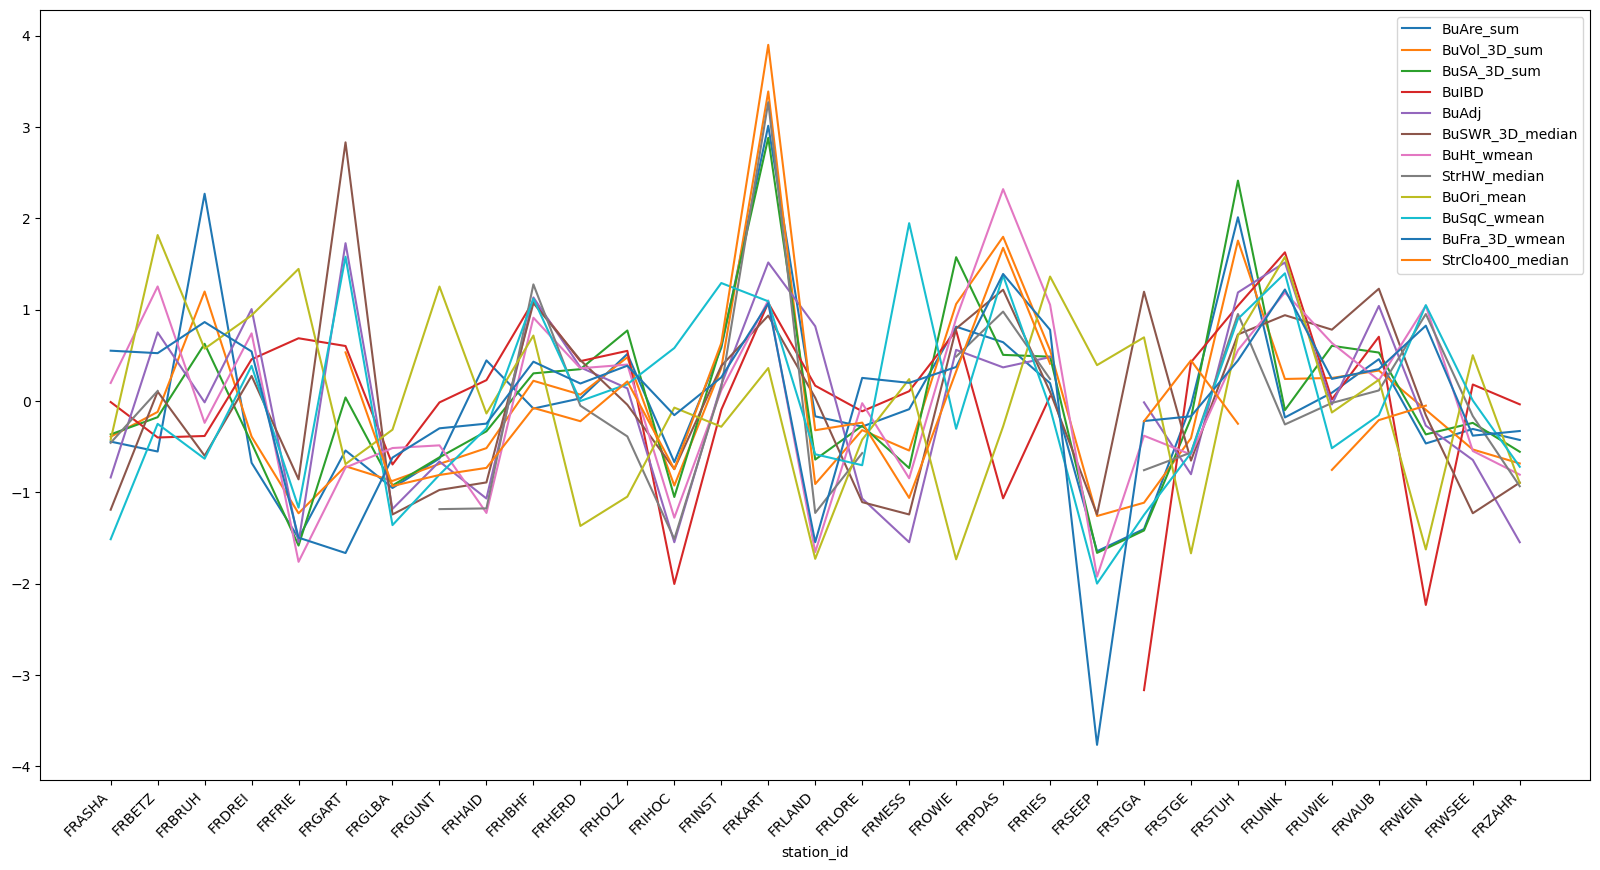

In [92]:
corr_matrix(params, 100)

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


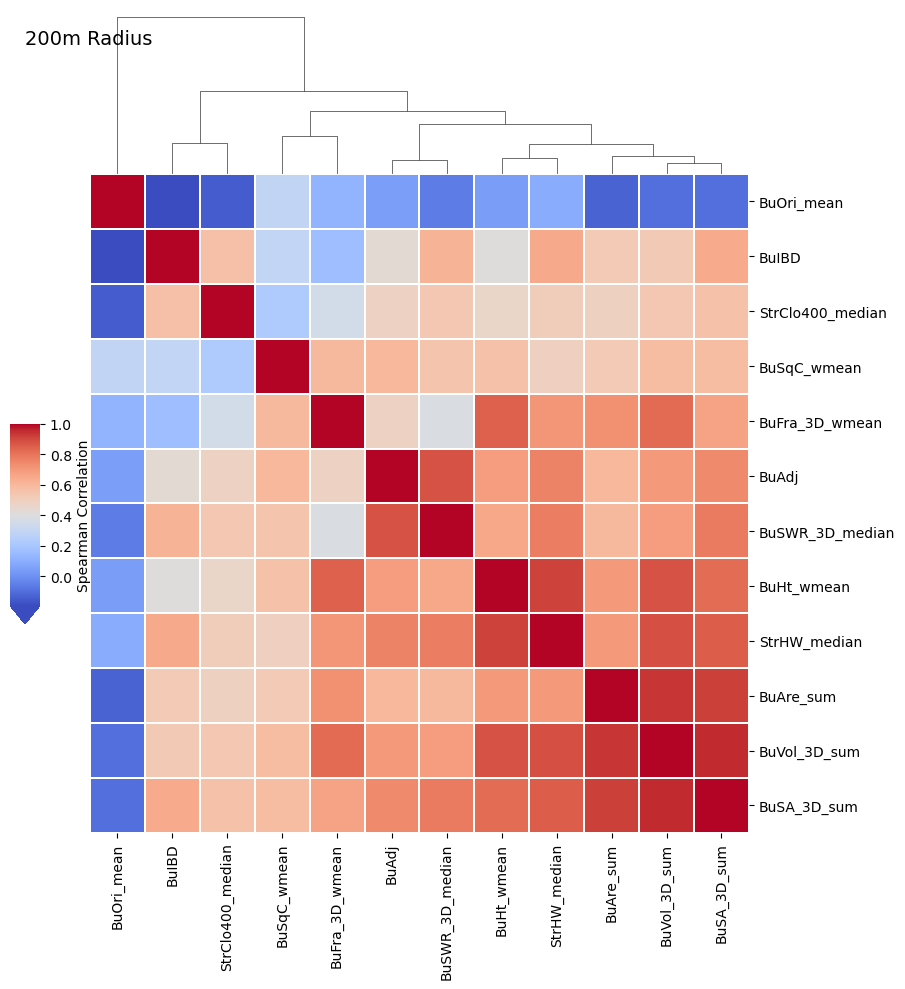

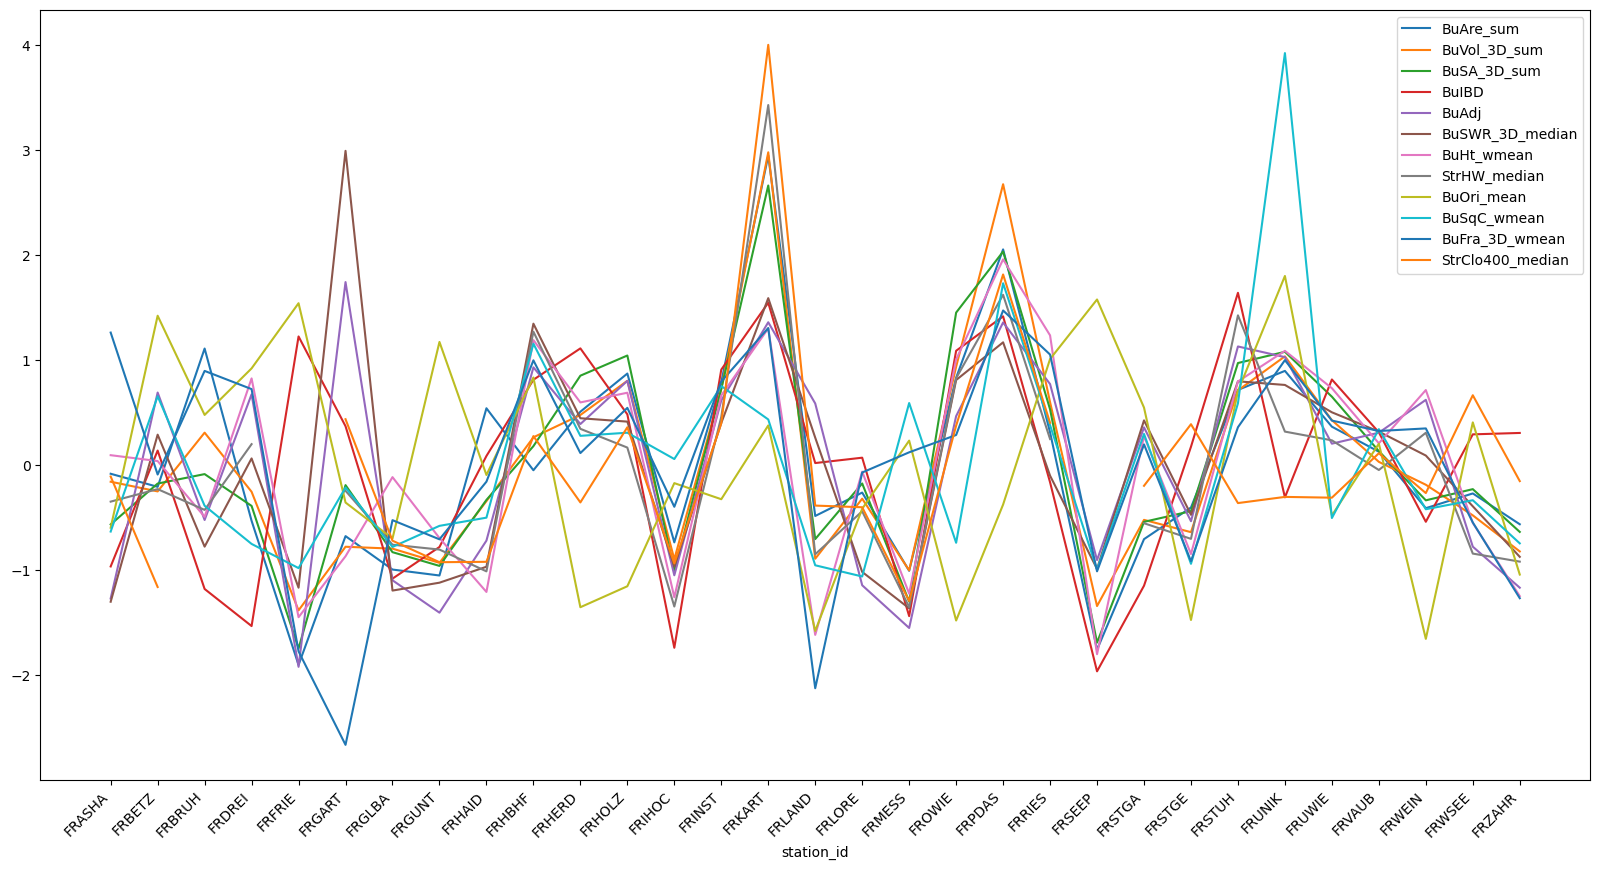

In [93]:
corr_matrix(params, 200)

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


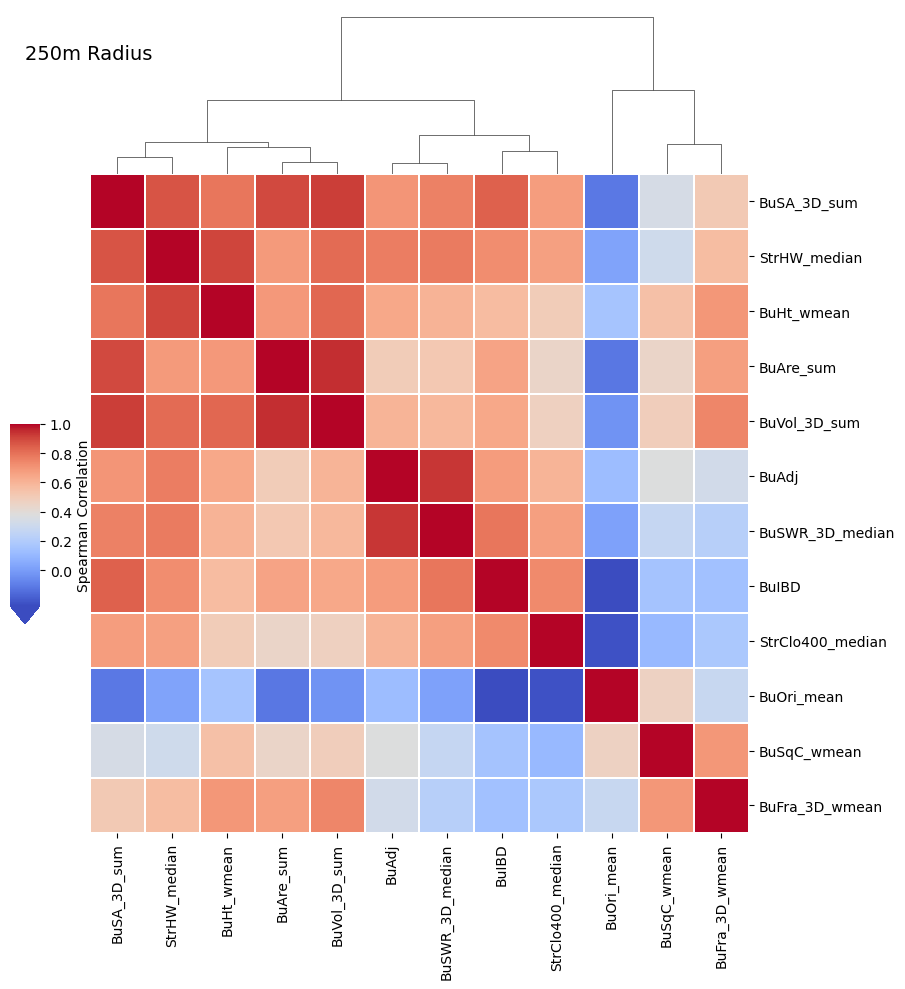

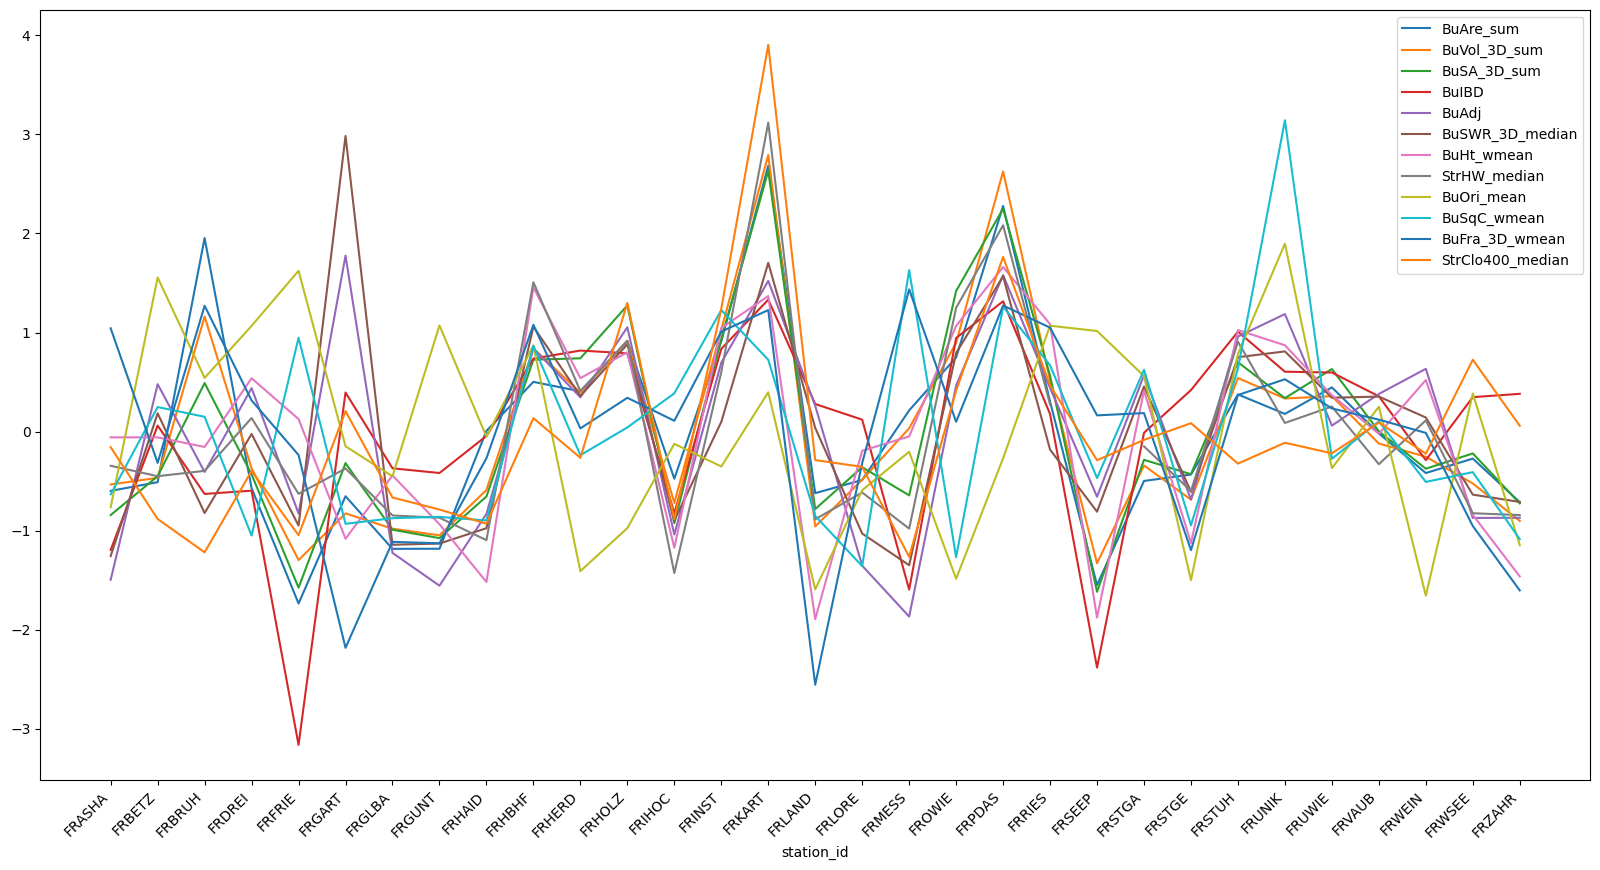

In [94]:
corr_matrix(params, 250)

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


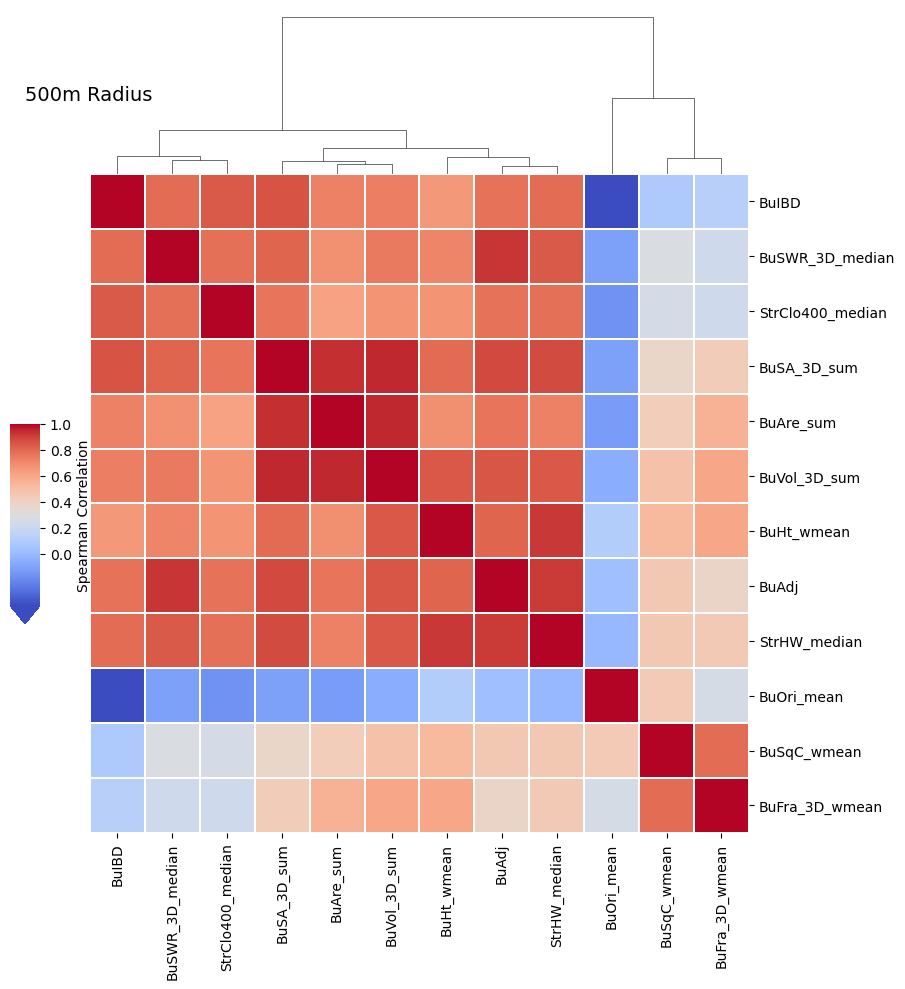

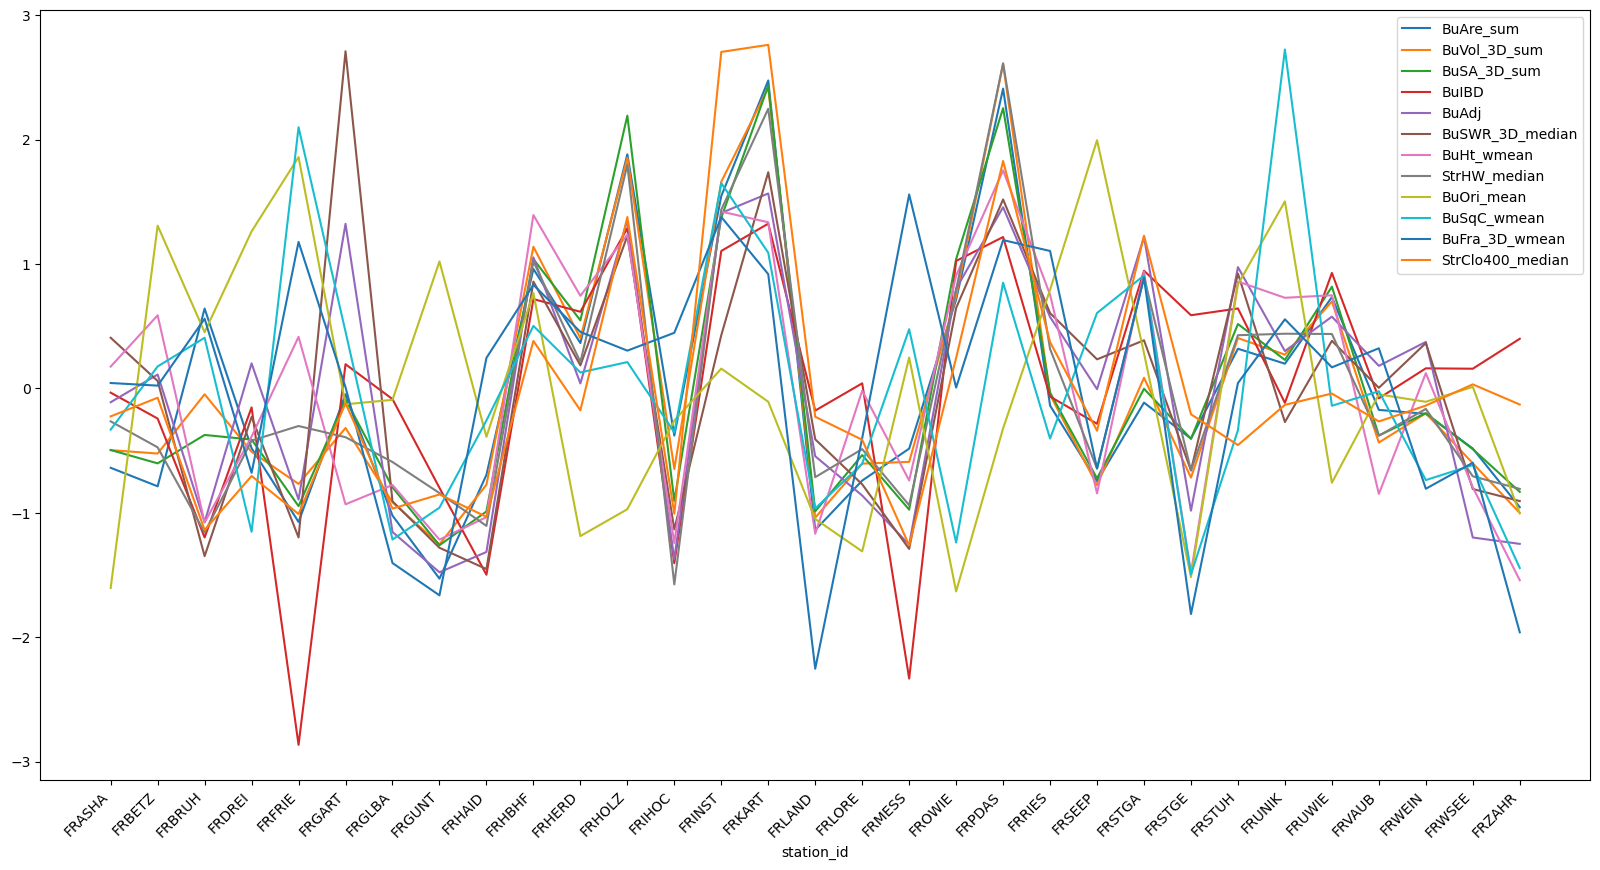

In [95]:
corr_matrix(params, 500)